In [1]:
from pycaret.nlp import *

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
from nltk.corpus import stopwords
stopWords = stopwords.words('english')

In [3]:
import pandas as pd


# load the data into a dataframe
data = pd.read_csv('google pegasus-xsum counsel answers answers.csv')
data.head(2)


,summerizedAnswers
0,"If you feel that you are worthless, then maybe..."
1,What can I do to improve my feelings of worthl...


In [4]:
data['sumans_without_stopwords'] = data['summerizedAnswers'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopWords)]))
data['summerizedAnswers'] = data['sumans_without_stopwords']
data['summerizedAnswers'].head()

0           If feel worthless, maybe need change life.
1               What I improve feelings worthlessness?
2                                   find purpose life?
3    Depression self esteem two common mental healt...
4                                                help?
Name: summerizedAnswers, dtype: object

In [5]:
data.head(2)

,summerizedAnswers,sumans_without_stopwords
0,"If feel worthless, maybe need change life.","If feel worthless, maybe need change life."
1,What I improve feelings worthlessness?,What I improve feelings worthlessness?


In [6]:
exp_nlp102 = setup(data = data, target = 'summerizedAnswers', session_id = 123,
                   custom_stopwords = ['would', 'want', 'usd', 'many', 'also', 'make', 
                                       'find','see', 'say', 'often', 'much', 'go', 'come',
                                       'thought', 'even','learn','happen','much','let','know','thing','need','take'
                                      , 'get','try','ask','maybe','keep','end','way','suggest','likely','area','part',
                                      'consider','right','able','could','tell','seem','use','sometimes','think','look','self','lot','new','well','give',
                                      'start'],
                   log_experiment = True, experiment_name = 'summerizedAnswers')

Description,Value
session_id,123
Documents,2129
Vocab Size,1418
Custom Stopwords,True


In [7]:

lda = create_model('lda',num_topics=200)


In [8]:
# to find the best suited number of topic for our case using intrinsic evalution
#tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

In [9]:
# using extrinsic evaluation using classifier
#tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = 'sumans_without_stopwords')

In [10]:

plot_model(lda, plot = 'topic_distribution')

In [11]:
plot_model()

In [16]:
 mplot = get_model_plot()
print(mplot)

NameError: name 'get_model_plot' is not defined

In [12]:
plot_model(plot = 'bigram')

In [13]:
#plot_model(lda, plot = 'frequency', topic_num = 'Topic 4')

In [14]:

plot_model(lda, plot = 'tsne')

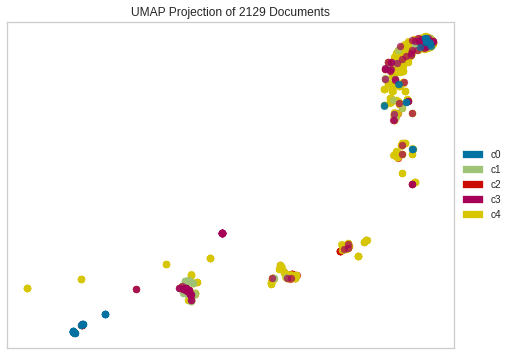

In [15]:
plot_model(lda, plot = 'umap')